# ワードクラウド

## 前準備

必要なライブラリのインポート

In [1]:
import wordcloud as wc

import pandas as pd
import matplotlib.pyplot as plt

データの読み込み

In [15]:
cas = pd.read_csv('../src/categories.csv').set_index('name')

In [26]:
qus_title_tf = pd.read_csv('../dst/tf/qus_title_tf.csv').set_index('用語')
qus_body_tf = pd.read_csv('../dst/tf/qus_body_tf.csv').set_index('用語')
ans_body_tf = pd.read_csv('../dst/tf/ans_body_tf.csv').set_index('用語')
all_tf = pd.read_csv('../dst/tf/all_tf.csv').set_index('用語')

qus_title_tfidf = pd.read_csv('../dst/tfidf/qus_title_tfidf.csv').set_index('用語')
qus_body_tfidf = pd.read_csv('../dst/tfidf/qus_body_tfidf.csv').set_index('用語')
ans_body_tfidf = pd.read_csv('../dst/tfidf/ans_body_tfidf.csv').set_index('用語')
all_tfidf = pd.read_csv('../dst/tfidf/all_tfidf.csv').set_index('用語')

In [18]:
cas_tfs = {}
cas_tfidfs = {}

for category_name in cas.index:
    tf = pd.read_csv(f"../dst/tf/{category_name}.csv").set_index('用語')
    tfidf = pd.read_csv(f"../dst/tfidf/{category_name}.csv").set_index('用語')

    cas_tfs[category_name] = tf
    cas_tfidfs[category_name] = tfidf

関数の定義

In [12]:
path_to_font = '/home/tat/.local/share/fonts/ipaex/ipaexg.ttf'

wc_base = wc.WordCloud(
    font_path = path_to_font,
    width = 1200,
    height = 600,
    background_color = None,
    mode='RGBA'
)

def drawwc(terms, output_path):
    if isinstance(terms, dict):
        wc_ins = wc_base.generate_from_frequencies(terms)
    else:
        wc_ins = wc_base.generate_from_text(' '.join(terms))

    plt.imshow(wc_base)
    plt.axis('off')
    
    wc_ins_svg = wc_ins.to_svg(embed_font=True)
    with open(output_path, 'w') as f:
        f.write(wc_ins_svg)

In [6]:
def dftodict(df):
    return {term: value for term, value in df.itertuples()}

## 文章の種類ごと

### TF

質問の表題

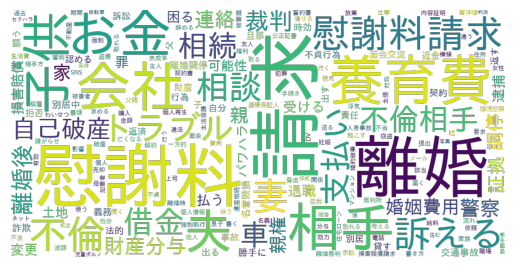

In [39]:
terms = dftodict(qus_title_tf)
del terms['言う']
del terms['教える']
drawwc(terms, 'dst/wc/tf/qus_title_tf.svg')

質問の本文

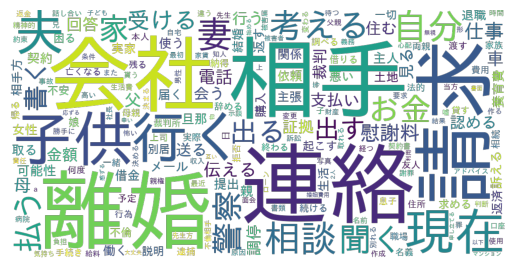

In [41]:
terms = dftodict(qus_body_tf)
del terms['言う']
del terms['教える']
del terms['願う']
drawwc(terms, 'dst/wc/tf/qus_body_tf.svg')

回答の本文

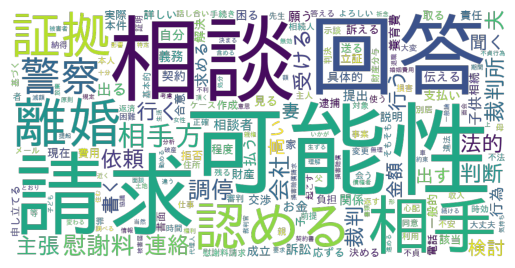

In [43]:
terms = dftodict(ans_body_tf)
del terms['言う']
del terms['教える']
del terms['考える']
drawwc(terms, 'dst/wc/tf/ans_body_tf.svg')

全文

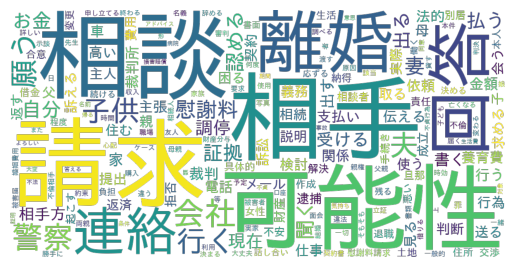

In [45]:
terms = dftodict(all_tf)
del terms['言う']
del terms['教える']
del terms['考える']
drawwc(terms, 'dst/wc/tf/all_tf.svg')

### TFIDF

質問の表題

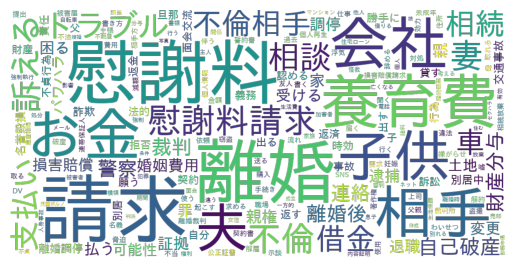

In [46]:
terms = dftodict(qus_title_tfidf)
del terms['言う']
del terms['教える']
drawwc(terms, 'dst/wc/tfidf/qus_title_tfidf.svg')

質問の本文

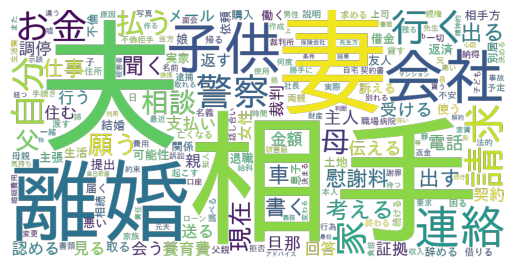

In [47]:
terms = dftodict(qus_body_tfidf)
del terms['言う']
del terms['教える']
drawwc(terms, 'dst/wc/tfidf/qus_body_tfidf.svg')

回答の本文

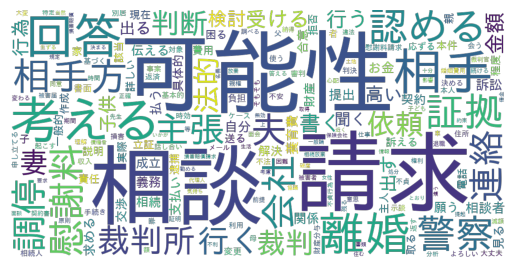

In [49]:
terms = dftodict(ans_body_tfidf)
del terms['言う']
del terms['教える']
drawwc(terms, 'dst/wc/tfidf/ans_body_tfidf.svg')

全文

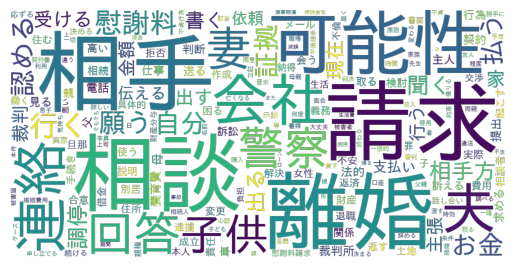

In [53]:
terms = dftodict(all_tfidf)
del terms['言う']
del terms['教える']
del terms['考える']
drawwc(terms, 'dst/wc/tfidf/all_tfidf.svg')

## カテゴリごと

### TF

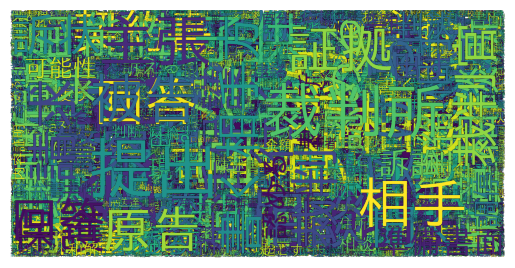

In [55]:
for category_name, tf in cas_tfs.items():
    terms = dftodict(tf)
    del terms['言う']
    del terms['教える']
    del terms['考える']
    del terms['願う']
    del terms['行う']
    drawwc(terms, f"dst/wc/tf/{category_name}.svg")

### TFIDF

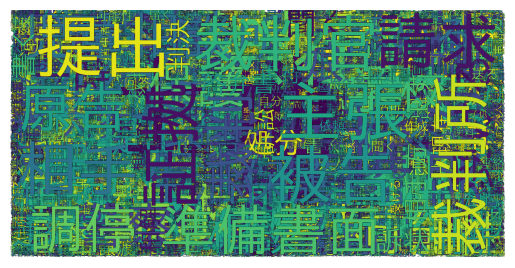

In [54]:
for category_name, tfidf in cas_tfidfs.items():
    terms = dftodict(tfidf)
    del terms['言う']
    del terms['教える']
    del terms['考える']
    del terms['願う']
    del terms['行う']
    drawwc(terms, f"dst/wc/tfidf/{category_name}.svg")